# Lecture 7, Gram-Schmidt

In [1]:
import numpy as np
import scipy.linalg as sla
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## Gram-Schmidt in Low Dimensions

### Generate Data and Plot

First, we are going to generate $p=100$ samples in $\mathbb{R}^2$:

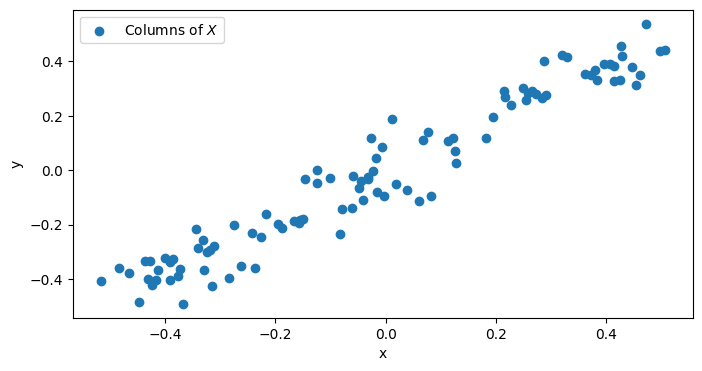

In [22]:
n = 2
p = 100
c = .01
Ustar = np.matrix([[1,c],[1,-c]])
Vstar = np.random.rand(n,p)-.5
noise = np.random.randn(n,p)/20

# The columns of X contain our 100 samples of points in R^2
X = np.matrix(Ustar@Vstar + noise)

# Plotting code below this line
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter([X[0]],[X[1]], label='Columns of $X$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


Now we are going to use 2 random columns of $X$ to compute Gram-Schmidt. We'll plot the first colum with a black x and the second column with a red x.

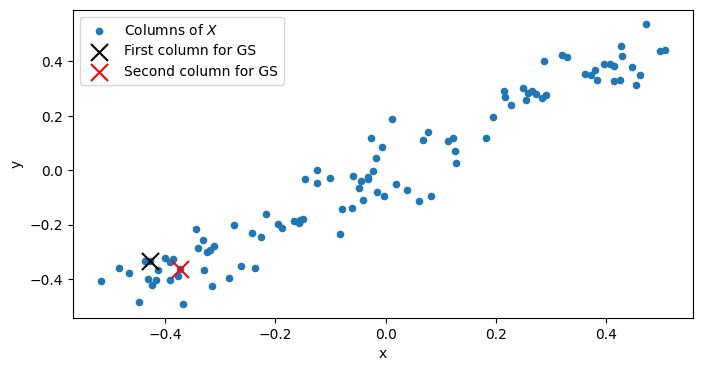

In [23]:
# i and j are the indices of the 2 random columns
i = np.random.randint(0,p)
j = np.random.randint(0,p)



# Plotting code below this line
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter([X[0]],[X[1]], label='Columns of $X$', s=20)
ax.scatter(X[0,i],X[1,i],c='k', label='First column for GS', marker='x', s=150)
ax.scatter(X[0,j],X[1,j],c='r', label='Second column for GS', marker='x', s=150)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()








### Perform Gram-Schmidt

Next we are going to compute G-S and store the result in the columns of $U$. When we plot the columns of $U$, what will it look like?

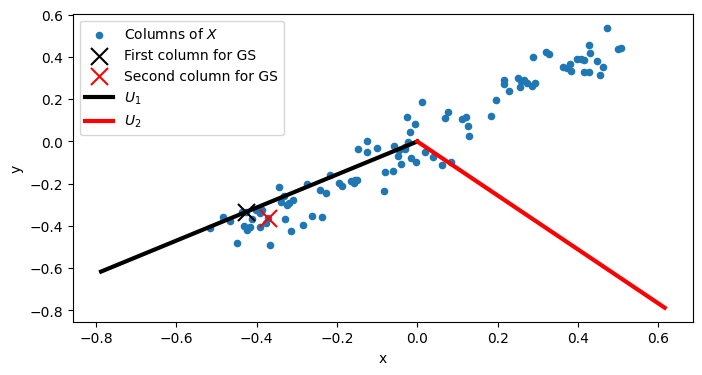

In [24]:


U1 = X[:,i]
U1 = U1/la.norm(U1)
U2 = X[:,j]-U1@U1.T@X[:,j]
U2 = U2/la.norm(U2)

# Plotting code below this line
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter([X[0]],[X[1]], label='Columns of $X$', s=20)
ax.scatter(X[0,i],X[1,i],c='k', label='First column for GS', marker='x', s=150)
ax.scatter(X[0,j],X[1,j],c='r', label='Second column for GS', marker='x', s=150)
ax.plot([0, U1[0]], [0, U1[1]],'k',linewidth=3, label='$U_1$')
ax.plot([0, U2[0]], [0, U2[1]],'r',linewidth=3, label='$U_2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()





## Gram-Schmidt in High Dimensions

### Create and Plot Data

In [2]:
np.random.seed(100)
X = np.random.normal(size=(10, 5))

We just generated a random $X \in \mathbb{R}^{10 \times 5}$. We would like to know if the columns of $X$ are orthonormal. When $X$ has lots of rows, it can be difficult to check that the columns of $X$ are orthonormal by looking at it. Look at the plot below. Can you tell if the columns are orthonormal?

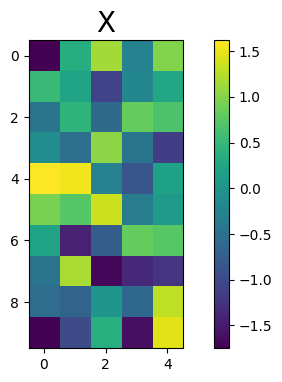

In [3]:
plt.imshow(X)
plt.colorbar()
plt.title("X", size=20)
plt.show()

### Plot Data in a Different Way

A better visual check is to look at the matrix $X^\top X$. Some questions:
1. What does the $(i, j)$ entry of matrix $X^\top X$ represent, in terms of the original matrix $X$?
2. If $X$ has orthonormal columns, what do we expect to see when we plot $X^\top X$?
3. If $X$ does not have orthonormal columns, what do we expect to see when we plot $X^\top X$?

In [4]:
def plot_matrix_pairwise_column_inner_prods(X: np.ndarray) -> None:
  """
  This function plots X^T X.

  Inputs: X (np.ndarray): has shape (n, p).
  """
  plt_arr = X.T @ X

  # find the max of the absolute vals of X^T X to set the colorscale
  max_val = np.max(np.abs(plt_arr))

  # This color norm ensures that 0 is always plotted as white
  color_norm = colors.TwoSlopeNorm(vmin=-1 * max_val,
                                   vcenter=0,
                                   vmax=max_val)

  plt.imshow(plt_arr, cmap='bwr', norm=color_norm)
  plt.ylabel("Row i", size=15)
  plt.xlabel("Column j", size=15)
  plt.colorbar()
  plt.title("$X^\\top X$",
            size=20)
  plt.show()

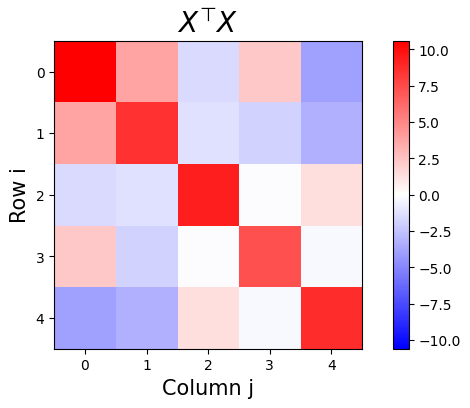

In [5]:
plot_matrix_pairwise_column_inner_prods(X)

### Perform Gram-Schmidt

Now, we will perform the Gram-Schmidt procedure on the first two columns of $X$.

In [6]:
X[:, 0] = X[:, 0] / np.linalg.norm(X[:, 0])

In [7]:
tmp_1 = X[:, 1] - np.dot(X[:, 0], X[:, 1]) * X[:, 0]
X[:, 1] = tmp_1 / np.linalg.norm(tmp_1)

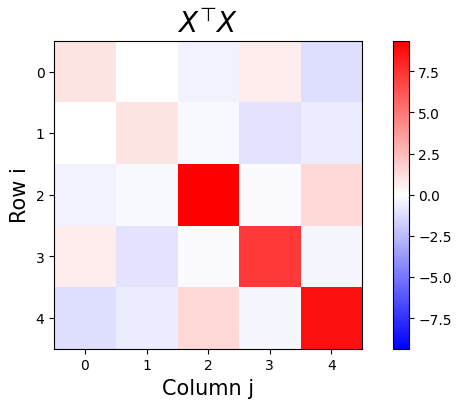

In [8]:
plot_matrix_pairwise_column_inner_prods(X)

Now, we will perform the Gram-Schmidt process on the third column of $X$.

In [9]:
tmp_2 = X[:, 2] - np.dot(X[:, 0], X[:, 2]) * X[:, 0] - np.dot(X[:, 1], X[:, 2]) * X[:, 1]
X[:, 2] = tmp_2 / np.linalg.norm(tmp_2)

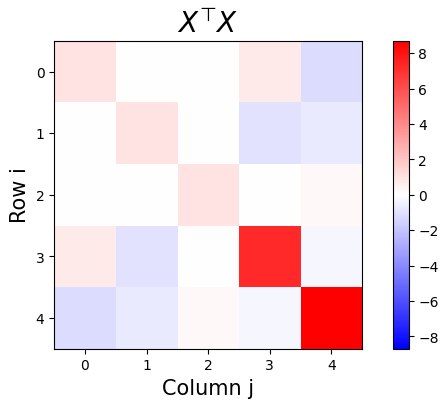

In [10]:
plot_matrix_pairwise_column_inner_prods(X)